## Лабораторна 3

### Завдання 1

<p>Завантажити Diabetes Dataset</p>

In [1]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
import graphviz
import numpy as np
from sklearn.model_selection import GridSearchCV

In [2]:
diabetes = datasets.load_diabetes(as_frame=True)
diabetes_df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
diabetes_df['target'] = diabetes.target

<p>1. Вивести перші 5 рядків</p>

In [3]:
diabetes_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


<p>2. Перевірити наявність пропусків. У разі виявлення замінити на середнє значення.</p>

In [4]:
diabetes_df.isnull().sum()

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

<p>Пропусків не виявлено</p>

<p>3. Перевірити наявність дублікатів, при виявленні – видалити.</p>

In [5]:
diabetes_df.duplicated().sum()

0

<p>Дублікатів не виявлено</p>

<p>4. Замінити бінарні ознаки. У стовпчику «стать» спочатку перевірте унікальні значення.</p>

In [6]:
diabetes_df['sex'].unique()

array([ 0.05068012, -0.04464164])

<p>Зробимо заміну: жінка - 0, чоловік - 1</p>

In [7]:
diabetes_df['sex'] = diabetes_df['sex'].map({diabetes_df['sex'].min(): 0, diabetes_df['sex'].max(): 1})

In [8]:
diabetes_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,1,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,0,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,1,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,0,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,0,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


<p>5. Перевірити тип даних. При необхідності замінити тип даних на числовий.</p>

In [9]:
diabetes_df.dtypes

age       float64
sex         int64
bmi       float64
bp        float64
s1        float64
s2        float64
s3        float64
s4        float64
s5        float64
s6        float64
target    float64
dtype: object

<p>Тип даних змінювати не потрібно</p>

<p>6. Обчислити кореляцію між прогресом діабету і іншмим ознаками. Розташувати в порядку спадання.
Побудувати теплову карту кореляції.
</p>

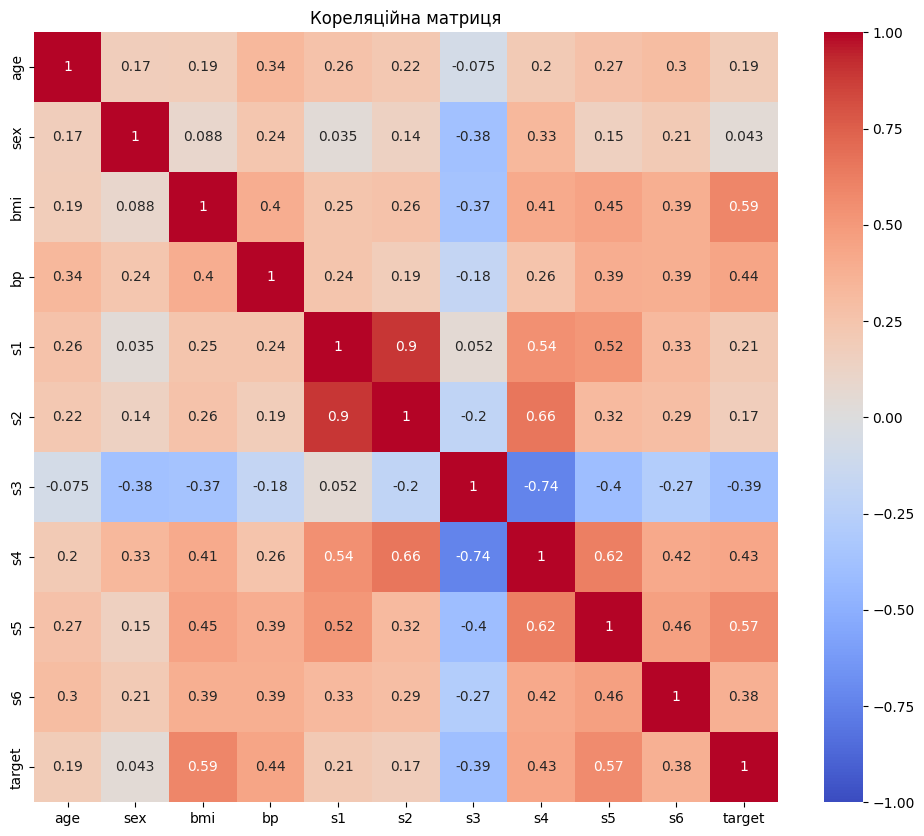

Кореляції з прогресом діабету:
target    1.000000
bmi       0.586450
s5        0.565883
bp        0.441482
s4        0.430453
s6        0.382483
s1        0.212022
age       0.187889
s2        0.174054
sex       0.043062
s3       -0.394789
Name: target, dtype: float64


In [10]:
correlation_matrix = diabetes_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Кореляційна матриця')
plt.show()

target_correlations = correlation_matrix['target'].sort_values(ascending=False)
print("Кореляції з прогресом діабету:")
print(target_correlations)

<p>Індекс маси тіла (bmi) має найсильнішу позитивну кореляцію з прогресом діабету</p>

<p>7. Маштабувати ознаки</p>

In [11]:
X = diabetes_df.drop(columns=['target'])
y = diabetes_df['target']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

<p>8. Поділити дані на тренувальну і тестову вибірки.</p>

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

<p>9. Побудувати модель лінійной регресії і RandomForest регресії на основі більш корелюючих ознак (підібрати оптимальне число).</p>

<p>Шляхом тестувань було виявлено, що найоптимальніше число обраних ознак - 10, бо таким чином MSE в обох моделях найменше </p>

In [13]:
r_forest = RandomForestRegressor(random_state=42)
r_forest.fit(X_train, y_train)
r_forest_predicted = r_forest.predict(X_test)
print(f'Предсказані дані:\n', r_forest_predicted)

Предсказані дані:
 [144.66 171.05 150.62 255.36 106.39 123.51 238.99 220.16 153.44 185.15
 103.27 185.32  93.08 236.52  86.1  140.68 241.74 262.34 164.56 220.76
 156.58 113.99  75.76 197.92 140.24 176.98 193.02 158.32  73.98 111.38
 166.87 102.24 182.62 207.63 160.26 204.71 107.03 112.15 176.29  76.38
  75.23  96.18 168.26 155.38 167.28  85.3   75.03 123.61  75.51 162.77
 106.4   88.79 178.42 116.68 189.34 141.43 101.44 223.34  91.58  87.15
 157.88 168.92 141.76 101.81 130.47 227.44 184.71 179.44 145.88 152.05
 185.06 191.84 211.7  109.86  81.01 158.08 212.67 164.95 184.47 203.1
  96.24 117.94  82.59  75.9   84.83  75.12  92.75  78.   157.32]


In [14]:
regression = LinearRegression()
regression.fit(X_train, y_train)
regression_predicted = regression.predict(X_test)
print(f'Предсказані дані:\n', regression_predicted)

Предсказані дані:
 [139.5475584  179.51720835 134.03875572 291.41702925 123.78965872
  92.1723465  258.23238899 181.33732057  90.22411311 108.63375858
  94.13865744 168.43486358  53.5047888  206.63081659 100.12925869
 130.66657085 219.53071499 250.7803234  196.3688346  218.57511815
 207.35050182  88.48340941  70.43285917 188.95914235 154.8868162
 159.36170122 188.31263363 180.39094033  47.99046561 108.97453871
 174.77897633  86.36406656 132.95761215 184.53819483 173.83220911
 190.35858492 124.4156176  119.65110656 147.95168682  59.05405241
  71.62331856 107.68284704 165.45365458 155.00975931 171.04799096
  61.45761356  71.66672581 114.96732206  51.57975523 167.57599528
 152.52291955  62.95568515 103.49741722 109.20751489 175.64118426
 154.60296242  94.41704366 210.74209145 120.2566205   77.61585399
 187.93203995 206.49337474 140.63167076 105.59678023 130.70432536
 202.18534537 171.13039501 164.91423047 124.72472569 144.81030894
 181.99635452 199.41369642 234.21436188 145.95665512  79.8

<p>10. Вивести коефіцієнт детермінації і середньоквадратичну помилку</p>

In [15]:
mse_lin = mean_squared_error(y_test, regression_predicted)
print(f'MSE Лінійної регресії: {mse_lin}')

MSE Лінійної регресії: 2900.1936284934814


In [16]:
mse_rf = mean_squared_error(y_test, r_forest_predicted)
print(f'MSE RandomForest регресії: {mse_rf}')

MSE RandomForest регресії: 2963.013847191012


In [17]:
r2_lr = r2_score(y_test, regression_predicted)
print('R^2 лінійної регресії: ', r2_lr)

R^2 лінійної регресії:  0.4526027629719195


In [18]:
r2_rf = r2_score(y_test, r_forest_predicted)
print('R^2 RandomForest: ', r2_rf)

R^2 RandomForest:  0.44074575666493343


<p>Середньоквадратична помилка занадто висока. Тожа дані моделі не підходять для вирішення цієї задачі</p>

<p>11. Побудувати графіки</p>

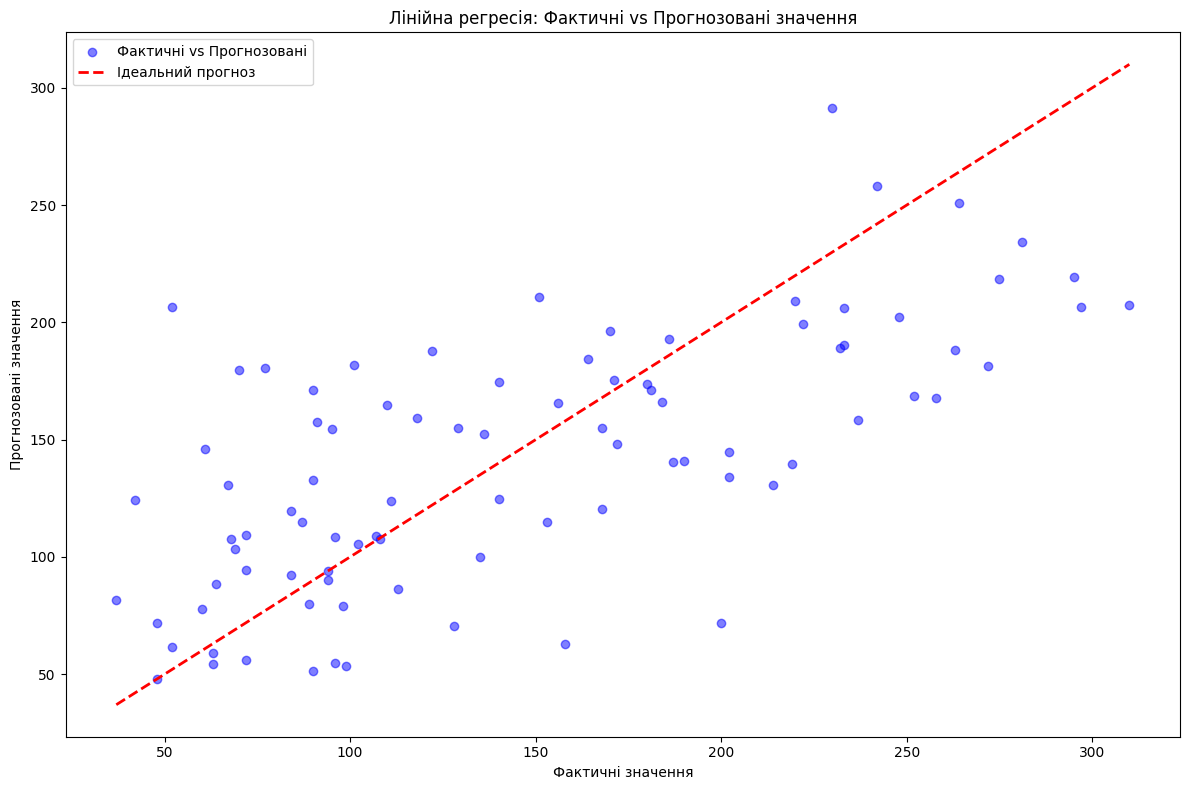

In [19]:
plt.figure(figsize=(12, 8))

plt.scatter(y_test, regression_predicted, color='blue', alpha=0.5, label='Фактичні vs Прогнозовані')

min_val = min(y_test.min(), regression_predicted.min())
max_val = max(y_test.max(), regression_predicted.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Ідеальний прогноз')

plt.xlabel('Фактичні значення')
plt.ylabel('Прогнозовані значення')
plt.title('Лінійна регресія: Фактичні vs Прогнозовані значення')
plt.legend()
plt.xlabel('Фактичні значення')
plt.ylabel('Прогнозовані значення')
plt.title('Лінійна регресія: Фактичні vs Прогнозовані значення')
plt.legend()
plt.tight_layout()
plt.show()

<p>Для візуалізації моделі RandoForest оберемо одне дерево </p>

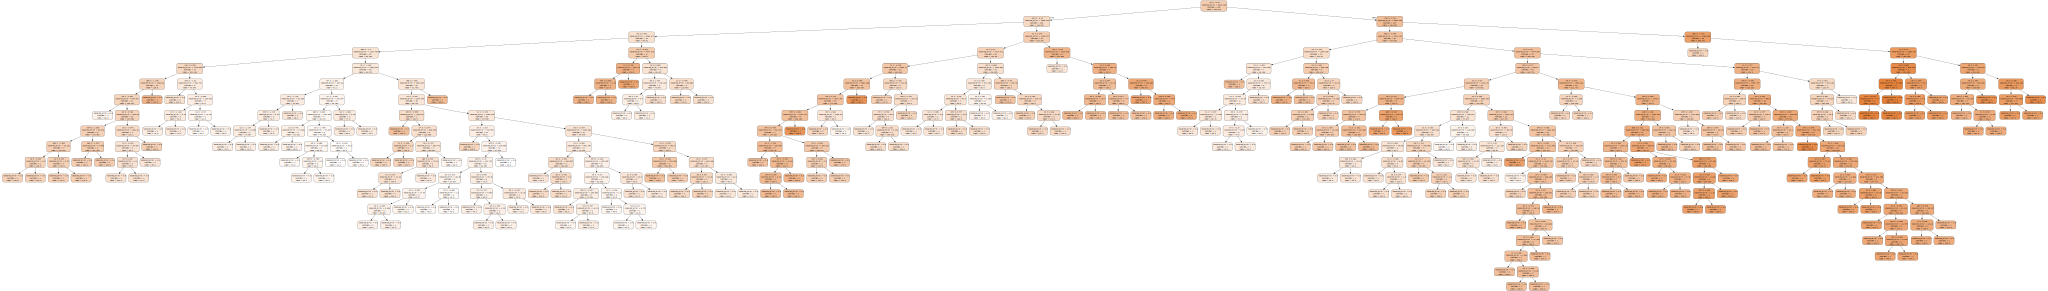

In [20]:
tree = r_forest.estimators_[1]

dot_data = export_graphviz(tree, 
                           out_file=None, 
                           feature_names=X.columns,
                           filled=True, 
                           rounded=True, 
                           special_characters=True)

# Використання graphviz для візуалізації
graph = graphviz.Source(dot_data)
graph.render("random_forest_tree")
graph

<p>12. Вивести справжні і прогнозовані значення</p>

In [21]:
print('Справжні значення: ', y_test)

Справжні значення:  287    219.0
211     70.0
72     202.0
321    230.0
73     111.0
       ...  
255    153.0
90      98.0
57      37.0
391     63.0
24     184.0
Name: target, Length: 89, dtype: float64


In [22]:
print('Прогнозовані значення лінійної регресії: ', regression_predicted)

Прогнозовані значення лінійної регресії:  [139.5475584  179.51720835 134.03875572 291.41702925 123.78965872
  92.1723465  258.23238899 181.33732057  90.22411311 108.63375858
  94.13865744 168.43486358  53.5047888  206.63081659 100.12925869
 130.66657085 219.53071499 250.7803234  196.3688346  218.57511815
 207.35050182  88.48340941  70.43285917 188.95914235 154.8868162
 159.36170122 188.31263363 180.39094033  47.99046561 108.97453871
 174.77897633  86.36406656 132.95761215 184.53819483 173.83220911
 190.35858492 124.4156176  119.65110656 147.95168682  59.05405241
  71.62331856 107.68284704 165.45365458 155.00975931 171.04799096
  61.45761356  71.66672581 114.96732206  51.57975523 167.57599528
 152.52291955  62.95568515 103.49741722 109.20751489 175.64118426
 154.60296242  94.41704366 210.74209145 120.2566205   77.61585399
 187.93203995 206.49337474 140.63167076 105.59678023 130.70432536
 202.18534537 171.13039501 164.91423047 124.72472569 144.81030894
 181.99635452 199.41369642 234.2143

In [23]:
print('Прогнозовані значення RandomForest: ', r_forest_predicted)

Прогнозовані значення RandomForest:  [144.66 171.05 150.62 255.36 106.39 123.51 238.99 220.16 153.44 185.15
 103.27 185.32  93.08 236.52  86.1  140.68 241.74 262.34 164.56 220.76
 156.58 113.99  75.76 197.92 140.24 176.98 193.02 158.32  73.98 111.38
 166.87 102.24 182.62 207.63 160.26 204.71 107.03 112.15 176.29  76.38
  75.23  96.18 168.26 155.38 167.28  85.3   75.03 123.61  75.51 162.77
 106.4   88.79 178.42 116.68 189.34 141.43 101.44 223.34  91.58  87.15
 157.88 168.92 141.76 101.81 130.47 227.44 184.71 179.44 145.88 152.05
 185.06 191.84 211.7  109.86  81.01 158.08 212.67 164.95 184.47 203.1
  96.24 117.94  82.59  75.9   84.83  75.12  92.75  78.   157.32]


<p>13. Написати ВИСНОВКИ</p>

<p>Висновки:
<ul>
    <li>було протестовано моделі: Лінійна Регресія та Random Forest</li>
    <li>створено матрицю кореляцій та порівняно кореляційні пари: найсильніша кореляційна пара - S1 та S2</li>
    <li>найсильніша кореляція з target - індекс маси тіла (bmi)</li>
    <li>для датасету diabetes не підходить жодна з цих моделей, бо MSE завелика</li>
    <li>було розглянуто методи візуалізації Лінійної Регресії та RandomForest</li>
</ul>
</p>

<p></p>

<p></p>

## Завдання 2

<p>Завантажити датасет California Housing Dataset, що містить інформацію про житло в Каліфорнії. Вивести перших 5 рядків</p>

In [24]:
housing = pd.read_csv('housing.csv')
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


<p>1.	Провести попередній аналіз даних за схемою (дивиться вище)</p>

In [25]:
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [26]:
housing.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [27]:
housing['total_bedrooms'] = housing['total_bedrooms'].apply(pd.to_numeric, errors='coerce')
housing['total_bedrooms'] = housing['total_bedrooms'].fillna(housing['total_bedrooms'].mean())
housing['total_bedrooms'] = housing['total_bedrooms'].astype(float)

In [28]:
housing.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

<p>Значення стовпця ocean_proximity можна модифікувати за допомогою метода get_dummies - створюємо нові стовпці, навпроти відвідних значень позначається 1 </p>

In [29]:
new_columns = pd.get_dummies(housing['ocean_proximity'], dtype=float)
housing = pd.concat([housing, new_columns], axis=1)
housing = housing.drop('ocean_proximity', axis=1)
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0.0,0.0,0.0,1.0,0.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0.0,0.0,0.0,1.0,0.0


In [30]:
housing.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
<1H OCEAN             float64
INLAND                float64
ISLAND                float64
NEAR BAY              float64
NEAR OCEAN            float64
dtype: object

In [31]:
housing.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
<1H OCEAN             0
INLAND                0
ISLAND                0
NEAR BAY              0
NEAR OCEAN            0
dtype: int64

<p>2.	Масштабувати ознаки</p>
<p>3.	Поділити дані на тренувальні і тестові.</p>

In [32]:
X = housing.drop(columns=['median_house_value'])
y = housing['median_house_value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

In [34]:
print("Маштабовані дані тренувальної вибірки:")
print(X_train_scaled.head())
print("\Маштабовані дані тестової вибірки:")
print(X_test_scaled.head())

Маштабовані дані тренувальної вибірки:
       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
14196   1.272587 -1.372811            0.348490     0.222569        0.211228   
8267    0.709162 -0.876696            1.618118     0.340293        0.593094   
17445  -0.447603 -0.460146           -1.952710    -0.342597       -0.495226   
14265   1.232698 -1.382172            0.586545    -0.561490       -0.409306   
2271   -0.108551  0.532084            1.142008    -0.119565       -0.256559   

       population  households  median_income  <1H OCEAN    INLAND    ISLAND  \
14196    0.768276    0.322906      -0.326196  -0.894683 -0.680574 -0.015566   
8267    -0.098901    0.672027      -0.035843  -0.894683 -0.680574 -0.015566   
17445   -0.449818   -0.430461       0.144701  -0.894683 -0.680574 -0.015566   
14265   -0.007434   -0.380587      -1.017864  -0.894683 -0.680574 -0.015566   
2271    -0.485877   -0.314962      -0.171488  -0.894683  1.469348 -0.015566   

       NEAR

<p>4.	Побудувати 3 моделі: лін. Регресія, регресія випадковий ліс, Ridge. Підібрати оптимальні параметри за допомогою GridSeach.</p>

In [35]:
regression = LinearRegression()
regression.fit(X_train, y_train)

LinearRegression()

In [36]:
rf_params = {
    'n_estimators': [100, 50],
    'max_depth': [10, 20]
}
r_forest = RandomForestRegressor(random_state=42)
rf_grid = GridSearchCV(r_forest, rf_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
rf_grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20], 'n_estimators': [100, 50]},
             scoring='neg_mean_squared_error')

In [37]:
ridge_params = {
    'alpha': [0.1, 1.0, 10.0],
    'solver': ['auto', 'svd', 'cholesky']
}

ridge_model = Ridge()
ridge_grid = GridSearchCV(ridge_model, ridge_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
ridge_grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.1, 1.0, 10.0],
                         'solver': ['auto', 'svd', 'cholesky']},
             scoring='neg_mean_squared_error')

In [38]:
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{model_name} - MSE: {mse:.2f}, R2: {r2:.2f}")
    return y_pred

<p>5.	Вивести R2      і      MSE. Побудувати графіки</p>

In [39]:
lr_predicted = evaluate_model(regression, X_test_scaled, y_test, "Linear Regression")

Linear Regression - MSE: 6088518113911.00, R2: -463.63


In [40]:
best_rf = rf_grid.best_estimator_
rf_predicted = evaluate_model(best_rf, X_test_scaled, y_test, "Random Forest")
print("Best parameters for Random Forest:", rf_grid.best_params_)

Random Forest - MSE: 2403684494.91, R2: 0.82
Best parameters for Random Forest: {'max_depth': 20, 'n_estimators': 100}


In [41]:
best_ridge = ridge_grid.best_estimator_
ridge_predicted = evaluate_model(best_ridge, X_test_scaled, y_test, "Ridge Regression")
print("Best parameters for Ridge Regression:", ridge_grid.best_params_)

Ridge Regression - MSE: 4900552973.17, R2: 0.63
Best parameters for Ridge Regression: {'alpha': 10.0, 'solver': 'auto'}


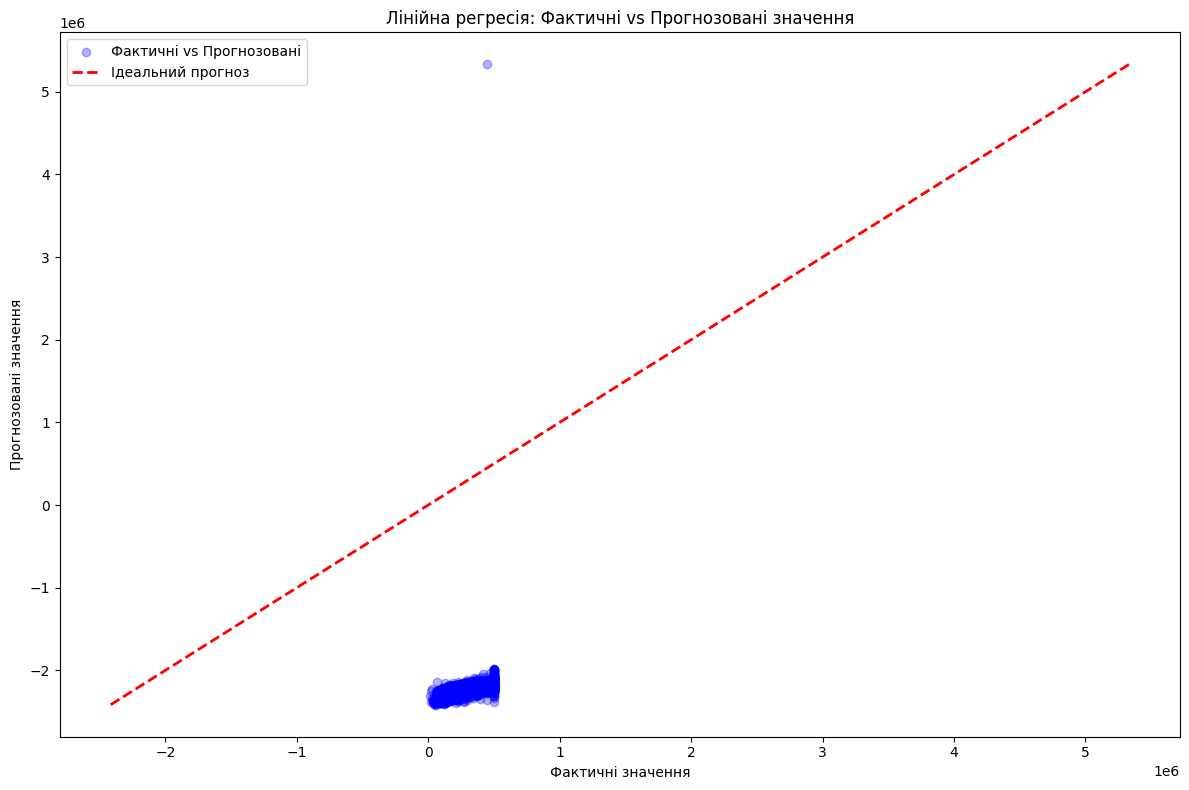

In [42]:
plt.figure(figsize=(12, 8))

plt.scatter(y_test, lr_predicted, color='blue', alpha=0.3, label='Фактичні vs Прогнозовані')

min_val = min(y_test.min(), lr_predicted.min())
max_val = max(y_test.max(), lr_predicted.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Ідеальний прогноз')

plt.xlabel('Фактичні значення')
plt.ylabel('Прогнозовані значення')
plt.title('Лінійна регресія: Фактичні vs Прогнозовані значення')
plt.legend()
plt.xlabel('Фактичні значення')
plt.ylabel('Прогнозовані значення')
plt.title('Лінійна регресія: Фактичні vs Прогнозовані значення')
plt.legend()
plt.tight_layout()
plt.show()

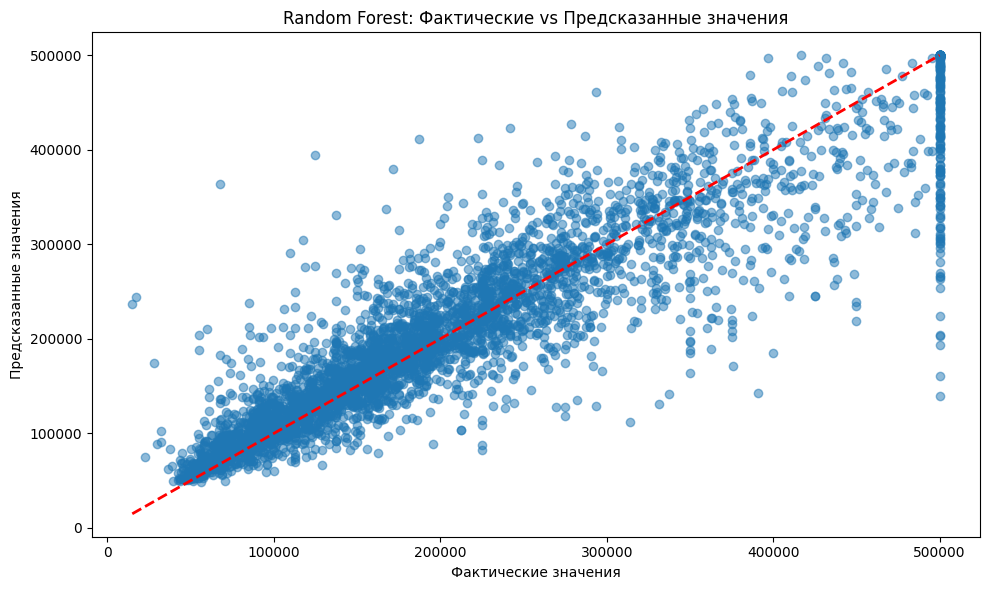

In [43]:
y_pred = rf_grid.best_estimator_.predict(X_test_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Фактические значения')
plt.ylabel('Предсказанные значения')
plt.title('Random Forest: Фактические vs Предсказанные значения')
plt.tight_layout()
plt.show()

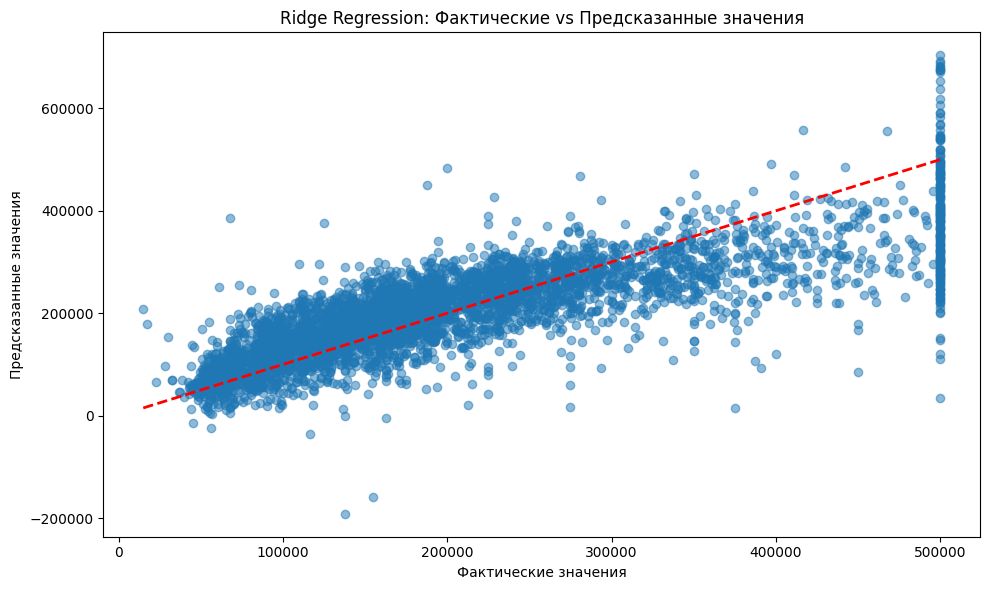

In [44]:
y_pred_ridge = ridge_grid.best_estimator_.predict(X_test_scaled)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_ridge, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Фактические значения')
plt.ylabel('Предсказанные значения')
plt.title('Ridge Regression: Фактические vs Предсказанные значения')
plt.tight_layout()
plt.show()

<p>6.	Вивести справжні і прогнозовані значення</p>

In [45]:
print('Справжні значення: ', y_test)

Справжні значення:  20046     47700.0
3024      45800.0
15663    500001.0
20484    218600.0
9814     278000.0
           ...   
15362    263300.0
16623    266800.0
18086    500001.0
2144      72300.0
3665     151500.0
Name: median_house_value, Length: 4128, dtype: float64


In [46]:
print('Прогнозовані значення лінійної моделі:', lr_predicted)

Прогнозовані значення лінійної моделі: [-2371883.84507083 -2336817.43398843 -2256990.55874422 ...
 -2101470.45988174 -2346467.73377081 -2232308.21164955]


In [47]:
print('Прогнозовані значення RandomForest:', rf_predicted)

Прогнозовані значення RandomForest: [ 53769.3903548   69496.02132756 469268.42666667 ... 496788.96
  70582.37791178 174509.97331148]


In [48]:
print('Прогнозовані значення Ridge:', ridge_predicted)

Прогнозовані значення Ridge: [ 64426.14308849 134295.92771043 266689.47384069 ... 438943.30162836
 120924.39801498 183475.43200083]


<p>7.	Написати ВИСНОВКИ</p>

<p>Висновки:
<ul>
     <li>було підготовлено та проаналізовано датасет housing</li>
     <li>за результатами 3 моделей метрика MSE зависока, тож для даної задачі потрібна інша модель</li>
     <li>було протестовано GridSearchCV</li>
</ul>
</p>